In [2]:
#To load data
import numpy as np
#Data visualization
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
import matplotlib.animation as animation
import cartopy.crs as ccrs
from scipy import stats
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cmocean
import xarray as xr
import cmath

Finding the standard error of the mean in each bin:

SEM = standard deviation / sqrt(# of samples)

In [3]:
file_path = '/Users/elifaigle/Desktop/Shane/gdp_v2.00.nc'
ds = xr.open_dataset(file_path)

In [4]:
ds

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    longitude              (obs) float32 ...
    latitude               (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/53)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [12]:
harmonicA1 = np.loadtxt('/Users/elifaigle/Desktop/Shane/harmonicsdata/A1')
harmonicA2 = np.loadtxt('/Users/elifaigle/Desktop/Shane/harmonicsdata/A2')
harmonicA3 = np.loadtxt('/Users/elifaigle/Desktop/Shane/harmonicsdata/A3')
SEMA1 = np.loadtxt('/Users/elifaigle/Desktop/Shane/SEMData/SEMA1')
SEMA2 = np.loadtxt('/Users/elifaigle/Desktop/Shane/SEMData/SEMA2')
SEMA3 = np.loadtxt('/Users/elifaigle/Desktop/Shane/SEMData/SEMA3')
SEMtot = np.loadtxt('/Users/elifaigle/Desktop/Shane/SEMData/SEMAtot')

In [6]:
lon = np.linspace(-180, 180, 360*2)
lat = np.linspace(-90, 90, 180*2)

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_47292/92164041.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


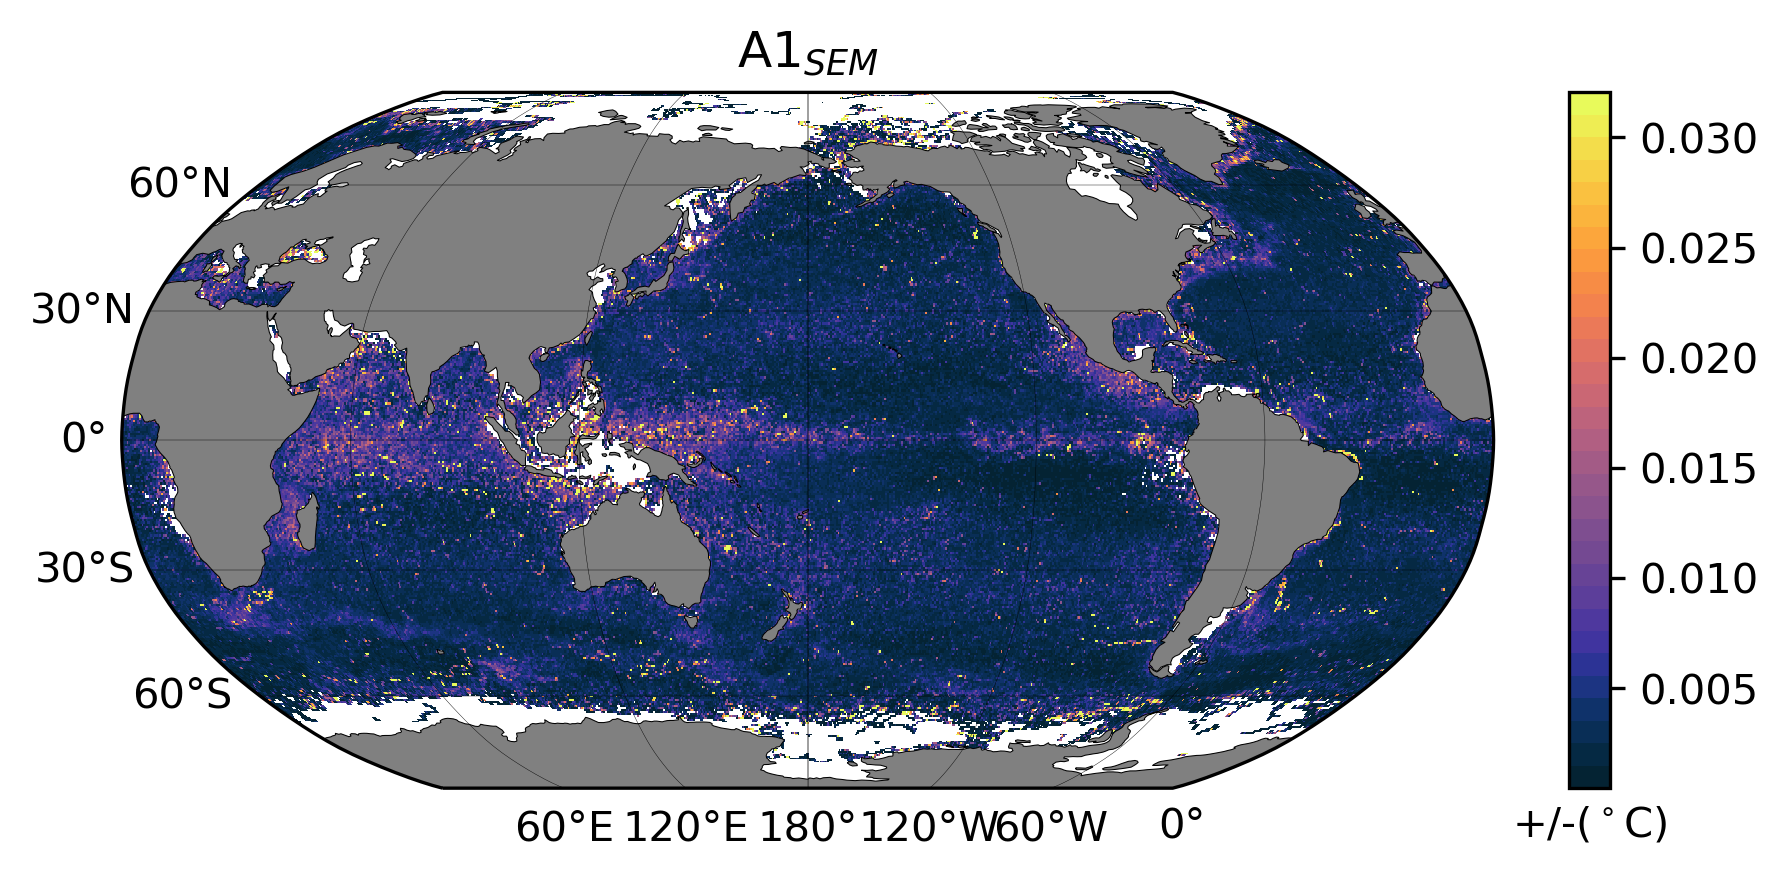

In [7]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(SEMA1,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    SEMA1,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('A1$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/A1SEM.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_47292/3012232232.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


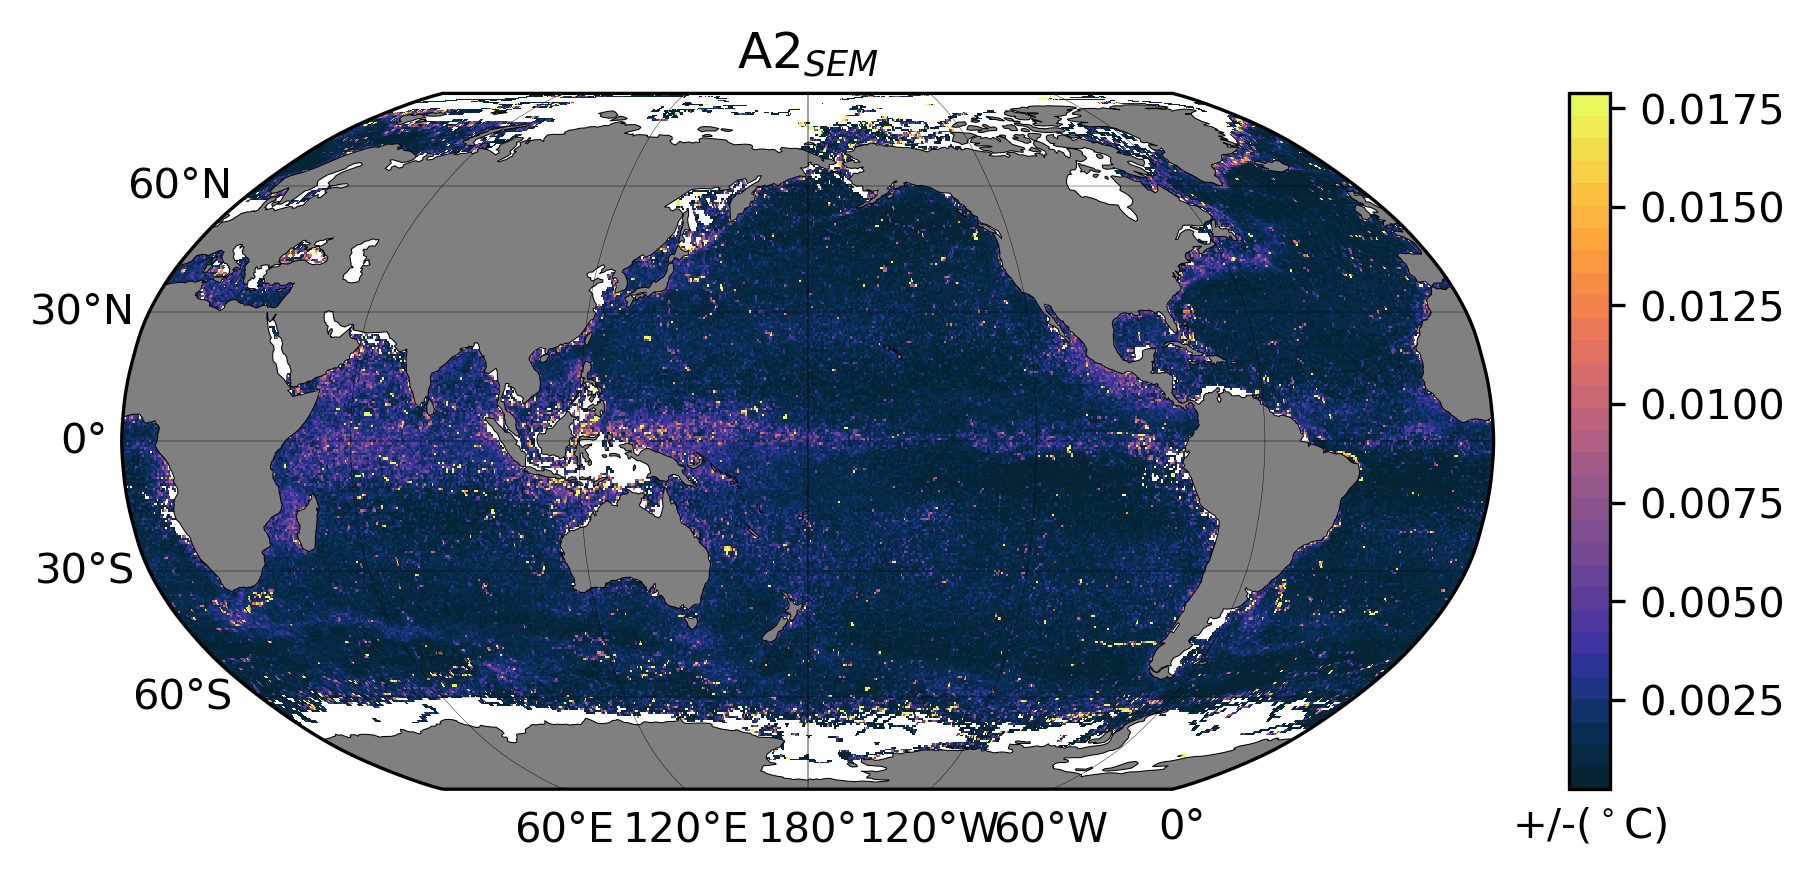

In [9]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(SEMA2,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    SEMA2,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('A2$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/A2SEM.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_47292/3734577509.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


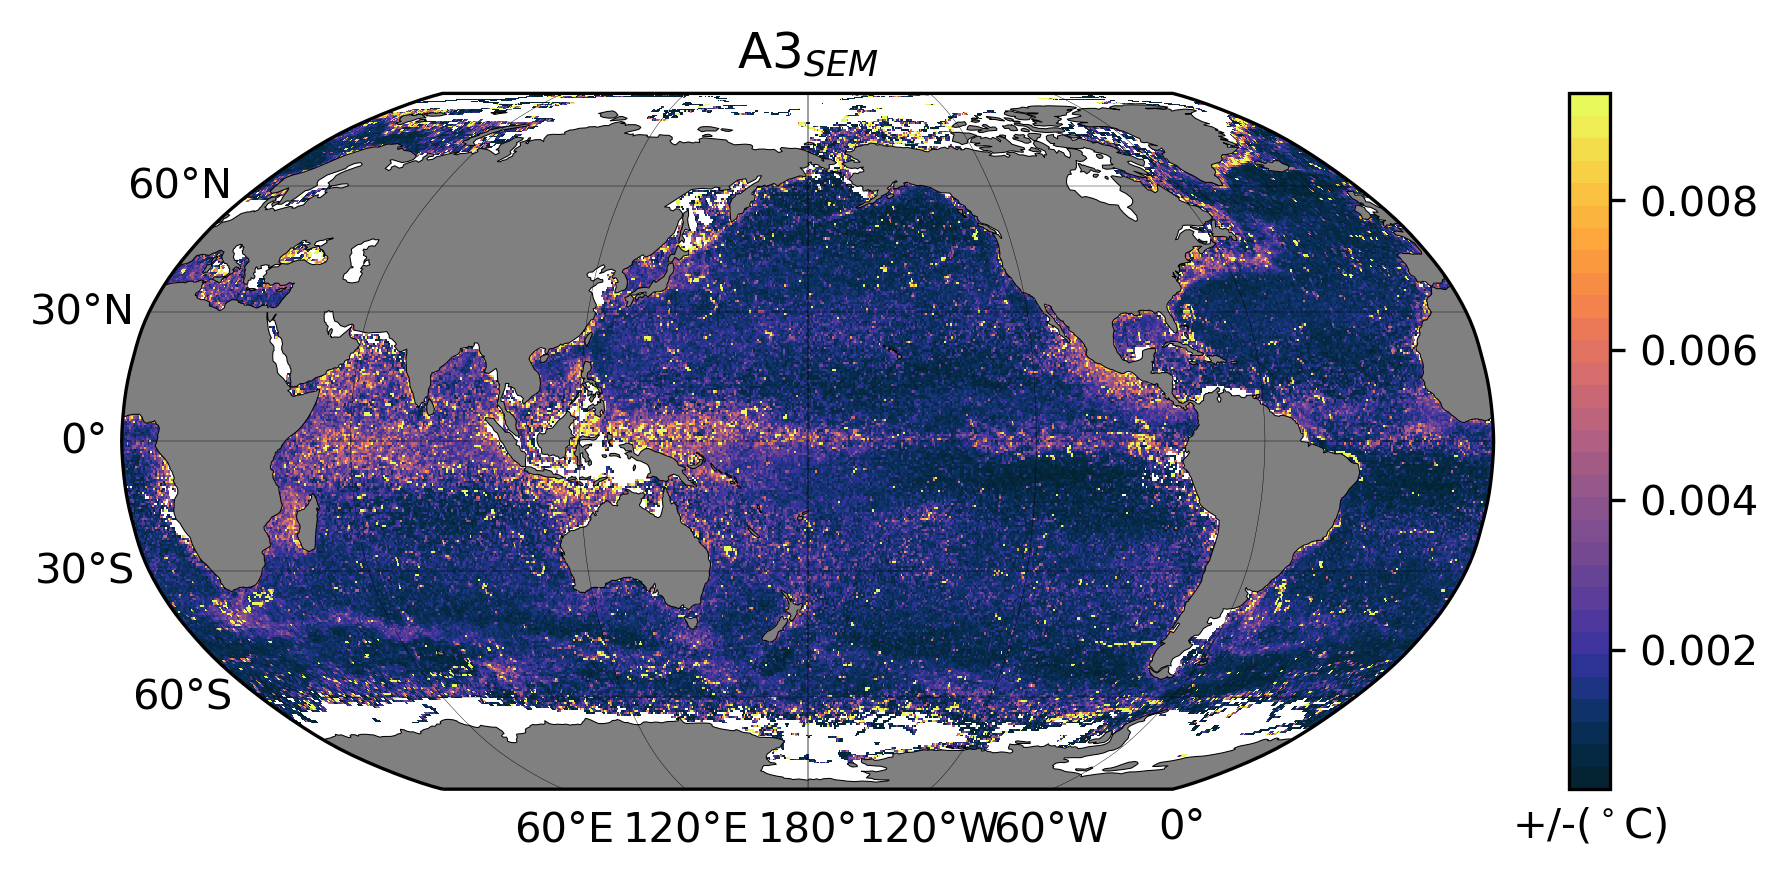

In [10]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(SEMA3,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    SEMA2,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('A3$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/A3SEM.png")

/var/folders/sp/w25h36ts7mjblxp7wdbshfvm0000gn/T/ipykernel_47292/29991485.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("cmo.thermal", 31)


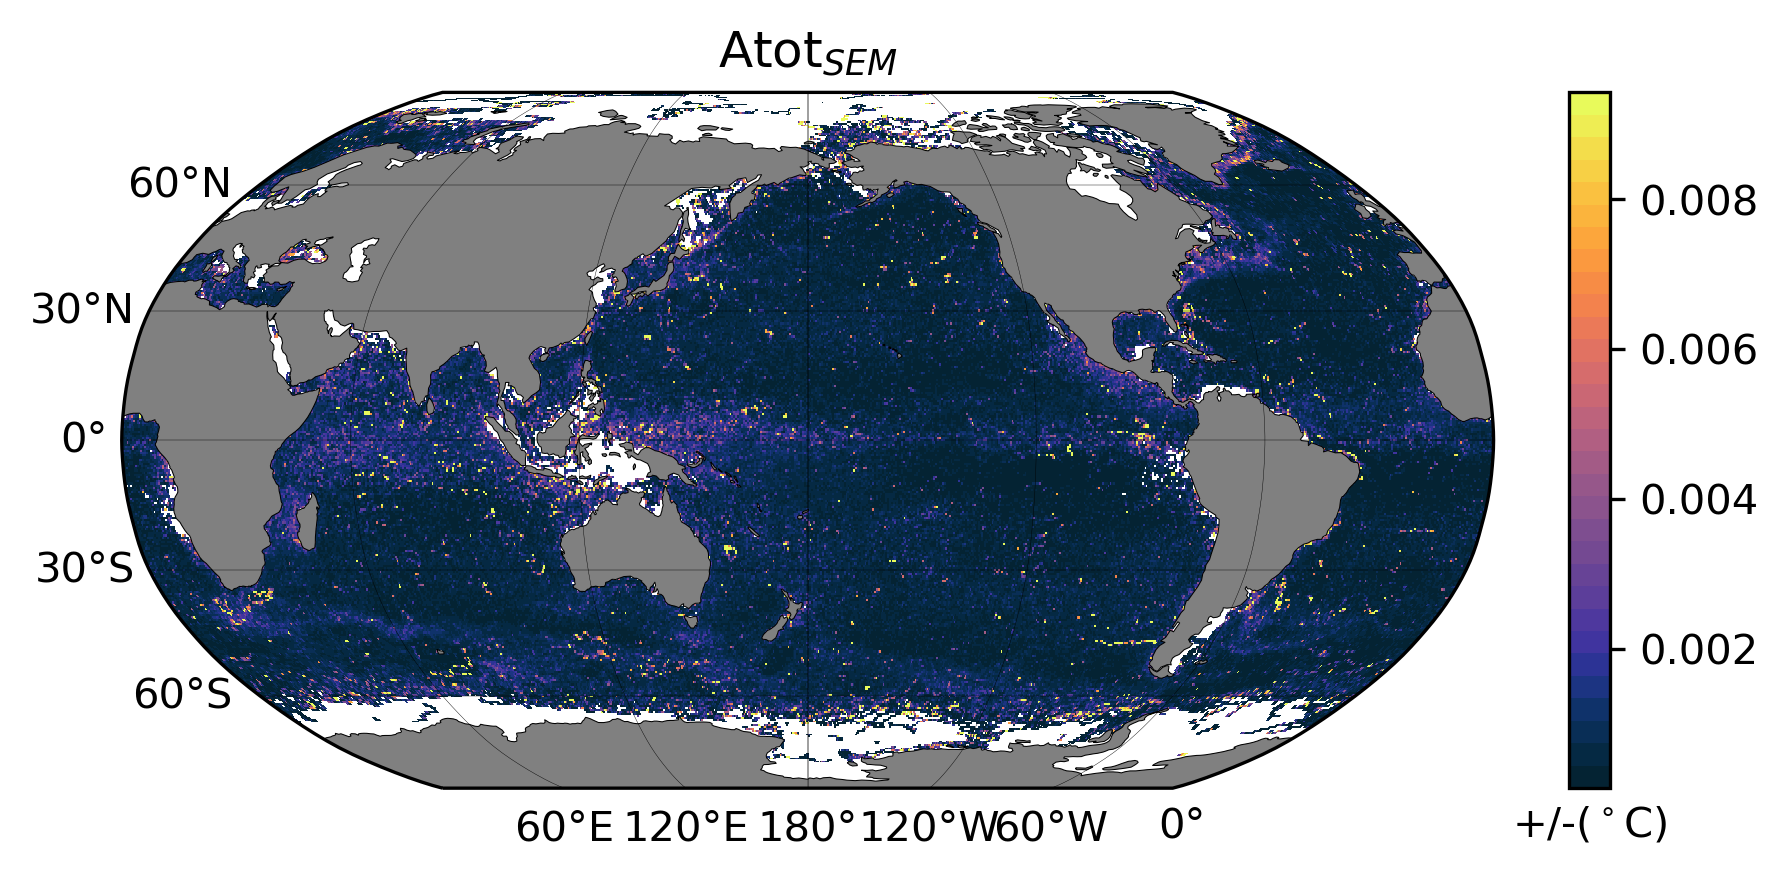

In [13]:
x_c = np.convolve(lon, [0.5, 0.5], mode='valid')
y_c = np.convolve(lat, [0.5, 0.5], mode='valid')

a1, a2 = np.nanpercentile(SEMtot,[1,99])
cmap = plt.cm.get_cmap("cmo.thermal", 31)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=-180))
pcm = ax.pcolormesh(x_c, y_c, 
                    SEMtot,
                    cmap= cmap,
                    transform=ccrs.PlateCarree(),
                    vmin=a1, vmax=a2)

# gridlines and labels
gl = ax.gridlines(color='k', linewidth=0.1, linestyle='-',
                  xlocs=np.arange(-180, 181, 60), ylocs=np.arange(-90, 91, 30),
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# add land and coastline
ax.add_feature(cfeature.LAND, facecolor='grey', zorder=1)
ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.25, axes_class=plt.Axes)
cb = fig.colorbar(pcm, cax=cax, orientation = "vertical");
ax.set_title('Atot$_{SEM}$',);
cb.ax.set_xlabel("+/-($^\circ$C)")
plt.savefig("/Users/elifaigle/Desktop/Shane/AtotSEM.png")